## Sales Prediction Modeling

**Key Components in Pipeline:**
    

- **Pipeline:**

    - A pipeline in scikit-learn allows us to chain multiple steps, such as preprocessing and model fitting, into one object. This ensures reproducibility and modularity.

- The pipeline consists of:

    - `StandardScaler`: For standardizing the numeric features.
    
    - `RandomForestRegresso`r: A tree-based regressor that works well with various types of data.

- `preprocess_data()`:

    - This method handles the preprocessing of the data by splitting it into training and test sets. It removes the target column from the features and separates them appropriately.

- `train_model():`

    - The model is trained using the training data through the pipeline, where the data is first scaled, and then the regressor is fit.

- `evaluate_model():`

    - The model is evaluated using the test set. The evaluation metric used is Root Mean Squared Error (RMSE), which is a standard regression metric to assess prediction accuracy.

- `feature_importance`
    - get the most important features

- `save_model()`
    - save the model
    
- `plot_actual_vs_predicted`

    - visualize the actual vs predicted to understand how the mode best fit to the training data

In [1]:
# Import necessary libraries
import pandas as pd
import logging
import os, sys
# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))
# Import SalesModel class
from sales_model_pipeline import SalesModel # type: ignore

# Set max rows and columns to display
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# Configure logging
logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

logger.info("Imported libraries and configured logging.")

2025-01-12 14:40:42,685 - INFO - Imported libraries and configured logging.


In [2]:
logger.info("Build Model Pipeline")
if __name__ == "__main__":
    # Assume you have a DataFrame `df` with all the preprocessed features and a target 'Sales'
    train = pd.read_csv('../data/pre_processed/train_processed.csv', low_memory=False, index_col='Date')  # Replace with your actual data
    
    test = pd.read_csv('../data/pre_processed/test_processed.csv', low_memory=False, index_col='Id')  # Replace with your actual data
    # Initialize the model class
    sales_model = SalesModel()

    # Preprocess the data and split into train/test sets
    sales_model.preprocess_data(train, target_column='Sales')
       
    # Train the RandomForestRegressor model
    sales_model.train_model()

    # Evaluate the model and print the RMSE
    sales_model.evaluate_model()
    # print(f"Model RMSE: {rmse:.2f}")

2025-01-12 14:40:49,271 - INFO - Build Model Pipeline
d:\KMAI3\Pharmaceuticals\.venv-w4\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\KMAI3\Pharmaceuticals\.venv-w4\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\KMAI3\Pharmaceuticals\.venv-w4\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Model RMSE: 0.20
Model RMSLE: 0.0074


In [3]:
# Print feature importance of each feature
sales_model.feature_importance().reset_index(name='score').sort_values(by='score', ascending=False)

,index,score
0,Sales_winsorized,9.999972e-01
1,Customers_winsorized,2.782506e-06
2,Weekday,2.468600e-09
3,DayOfWeek,8.063713e-10
4,CompetitionDistance_log,2.143996e-10
5,DaysAfterHoliday,1.342671e-10
6,CompetitionDistance,1.102226e-10
7,StoreType,4.850928e-11
8,DaysToHoliday,1.851184e-11
9,IsEndOfMonth,3.943332e-12


In [4]:
# Save the model
sales_model.save_model()

Model saved as sales_model_2025-01-12-14-47-25.pkl


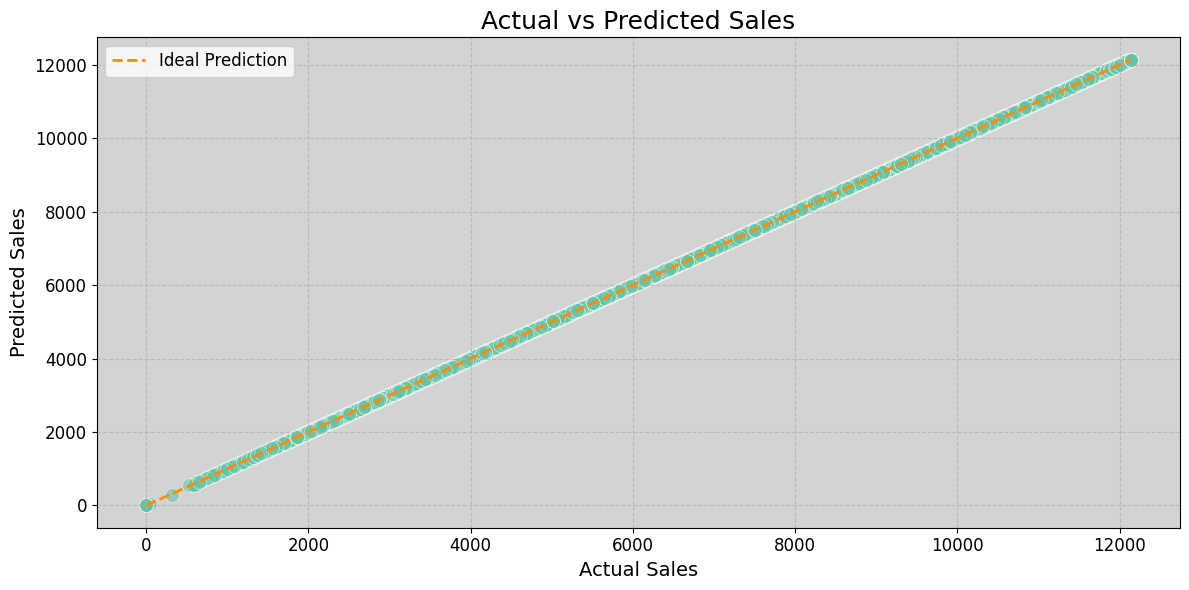

In [6]:
# plot actual vs predicted
sales_model.plot_actual_vs_predicted()

In [7]:
# Save Submission
sales_model.create_submission_file(test, '../data/submission.csv')

Submission file saved as ../data/submission.csv
